In [22]:
import pandas as pd

df_apt = pd.read_excel('./data/아파트(매매)_실거래가_orig.xlsx',
                       thousands="," ,# 숫자사이 콤마를 없앰
                       skiprows=12,
                       # dtype : 특정 컬럼의 타입을 지정
                       dtype={'계약년월':str, '계약일':str}
                       # encoding="KSC5621", # EUC-KR, CP949
                      )
pd.set_option('display.max_columns', None)
df_apt.head()

C:\Users\dlsgh\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,주택유형
0,1,서울특별시 동대문구 장안동,336,336,0,장안현대홈타운(336),84.870,202412,31,96500,제122동,18,개인,개인,2003,장한로18길 82-14,-,중개거래,서울 동대문구,25.03.04,아파트
1,2,서울특별시 광진구 광장동,576,576,0,광장현대9단지,59.970,202412,31,112500,902,4,개인,개인,1999,아차산로69길 19,-,중개거래,서울 광진구,25.02.28,아파트
2,3,서울특별시 용산구 동자동,19-8,19,8,동자,27.340,202412,31,44000,비,3,개인,개인,1969,한강대로104마길 30,-,중개거래,서울 용산구,25.01.13,아파트
3,4,서울특별시 종로구 홍파동,199,199,0,경희궁자이(2단지),84.614,202412,31,233000,209,4,개인,개인,2017,송월길 99,-,중개거래,서울 종로구,25.03.27,아파트
4,5,서울특별시 동대문구 용두동,792,792,0,래미안 허브리츠,59.980,202412,31,105800,101,10,개인,개인,2011,정릉천동로 36,-,중개거래,서울 동대문구,25.03.17,아파트


In [2]:
df_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57211 entries, 0 to 57210
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        57211 non-null  int64  
 1   시군구       57211 non-null  object 
 2   번지        57211 non-null  object 
 3   본번        57211 non-null  int64  
 4   부번        57211 non-null  int64  
 5   단지명       57211 non-null  object 
 6   전용면적(㎡)   57211 non-null  float64
 7   계약년월      57211 non-null  int64  
 8   계약일       57211 non-null  int64  
 9   거래금액(만원)  57211 non-null  int64  
 10  동         57211 non-null  object 
 11  층         57211 non-null  int64  
 12  매수자       57211 non-null  object 
 13  매도자       57211 non-null  object 
 14  건축년도      57211 non-null  int64  
 15  도로명       57211 non-null  object 
 16  해제사유발생일   57211 non-null  object 
 17  거래유형      57211 non-null  object 
 18  중개사소재지    57211 non-null  object 
 19  등기일자      57211 non-null  object 
 20  주택유형      57211 non-null  ob

In [5]:
df_apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,주택유형,주소구,주소동
0,1,서울특별시 동대문구 장안동,336,336,0,장안현대홈타운(336),84.870,202412,31,96500,제122동,18,개인,개인,2003,장한로18길 82-14,-,중개거래,서울 동대문구,25.03.04,아파트,동대문구,장안동
1,2,서울특별시 광진구 광장동,576,576,0,광장현대9단지,59.970,202412,31,112500,902,4,개인,개인,1999,아차산로69길 19,-,중개거래,서울 광진구,25.02.28,아파트,광진구,광장동
2,3,서울특별시 용산구 동자동,19-8,19,8,동자,27.340,202412,31,44000,비,3,개인,개인,1969,한강대로104마길 30,-,중개거래,서울 용산구,25.01.13,아파트,용산구,동자동
3,4,서울특별시 종로구 홍파동,199,199,0,경희궁자이(2단지),84.614,202412,31,233000,209,4,개인,개인,2017,송월길 99,-,중개거래,서울 종로구,25.03.27,아파트,종로구,홍파동
4,5,서울특별시 동대문구 용두동,792,792,0,래미안 허브리츠,59.980,202412,31,105800,101,10,개인,개인,2011,정릉천동로 36,-,중개거래,서울 동대문구,25.03.17,아파트,동대문구,용두동


#### 통계를 위해 전처리 작업
- 시군구를 나누기
- 계약년월 -> 계약년, 계약월
- 전용면적 -> 평,
- 평 -> 평형
- 계약년월일 -> 계약 요일 추출

In [41]:
# 시군구를 나누기
# df_apt['시'] = df_apt['시군구'].str.split().str[0] # 시
df_apt['주소구'] = df_apt['시군구'].str.split().str[1] # 구
df_apt['주소동'] = df_apt['시군구'].str.split().str[2] # 동
df_apt[['주소구','주소동']].head(3)

,주소구,주소동
0,동대문구,장안동
1,광진구,광장동
2,용산구,동자동


In [40]:
# 계약년월 -> 계약년, 계약월
df_apt['계약년'] = df_apt["계약년월"].astype('int64')//100 # 계약년
df_apt['계약월'] = df_apt["계약년월"].astype('int64')%100 # 계약월
df_apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,주택유형,주소구,주소동,계약요일,계약년,계약월
0,1,서울특별시 동대문구 장안동,336,336,0,장안현대홈타운(336),84.870,202412,31,96500,제122동,18,개인,개인,2003,장한로18길 82-14,-,중개거래,서울 동대문구,25.03.04,아파트,동대문구,장안동,화,2024,12
1,2,서울특별시 광진구 광장동,576,576,0,광장현대9단지,59.970,202412,31,112500,902,4,개인,개인,1999,아차산로69길 19,-,중개거래,서울 광진구,25.02.28,아파트,광진구,광장동,화,2024,12
2,3,서울특별시 용산구 동자동,19-8,19,8,동자,27.340,202412,31,44000,비,3,개인,개인,1969,한강대로104마길 30,-,중개거래,서울 용산구,25.01.13,아파트,용산구,동자동,화,2024,12
3,4,서울특별시 종로구 홍파동,199,199,0,경희궁자이(2단지),84.614,202412,31,233000,209,4,개인,개인,2017,송월길 99,-,중개거래,서울 종로구,25.03.27,아파트,종로구,홍파동,화,2024,12
4,5,서울특별시 동대문구 용두동,792,792,0,래미안 허브리츠,59.980,202412,31,105800,101,10,개인,개인,2011,정릉천동로 36,-,중개거래,서울 동대문구,25.03.17,아파트,동대문구,용두동,화,2024,12


In [31]:
# 계약년월일 -> 계약 요일 추출
# print(df_apt['계약일'].dtype)
# print(df_apt['계약일'].astype(str).dtype)
# print(df_apt['계약년월'].dtype)
# print(df_apt['계약년월'].astype(str).dtype)
# ctym = df_apt['계약년월'].astype(str)
# ctd = df_apt['계약일'].astype(str)
# pd.to_datetime()
# day_str = "월 화 수 목 금 토 일".split()
# 숫자를 요일로 변환 0 -> 월
# ctym + ctd.str.zfill(2) # zfill() 앞자리를 정해진 자리수만큼 0으로 채움
df_apt['계약요일'] = pd.to_datetime( df_apt['계약년월'] + df_apt['계약일'], format='%Y%m%d').dt.day_name(locale='ko_kr').str[0]
df_apt['계약요일']

0        화
1        화
2        화
3        화
4        화
        ..
57206    월
57207    월
57208    월
57209    월
57210    월
Name: 계약요일, Length: 57211, dtype: object

In [46]:
df_apt.groupby('주소구').count() # 그룹별 갯수
df_apt.groupby('주소구')[['거래금액(만원)','전용면적(㎡)']].mean().head() # 주소구 별 거래금액,전용면적 평균

,거래금액(만원),전용면적(㎡)
주소구,,
강남구,249275.651112,88.965799
강동구,103134.166276,70.375575
강북구,60680.474558,71.213538
강서구,81221.368607,70.863659
관악구,73768.020216,73.535675


In [48]:
df_apt.groupby('주소구')[['거래금액(만원)','전용면적(㎡)']].mean().loc[['강남구']]

,거래금액(만원),전용면적(㎡)
주소구,,
강남구,249275.651112,88.965799


계약 월별 거래건수를 구하고 3월달의 계약건수를 출력

In [50]:
df_apt.groupby('계약월')[['거래금액(만원)']].count()

,거래금액(만원)
계약월,
1,2686
2,2715
3,4450
4,4647
5,5300
6,7936
7,9224
8,6531
9,3178


In [52]:
df_apt.groupby('계약월')[['거래금액(만원)']].count().loc[[3]]

,거래금액(만원)
계약월,
3,4450


- 주소구별 계약월별 계약건수 출력하시오

In [55]:
df_apt.groupby(['주소구','계약월'])['거래금액(만원)'].count()

주소구  계약월
강남구  1      195
     2      173
     3      239
     4      289
     5      324
           ... 
중랑구  8      201
     9       96
     10     115
     11      93
     12      83
Name: 거래금액(만원), Length: 300, dtype: int64

In [69]:
countByAddrGuMonth = pd.pivot_table(
    df_apt,
    index='주소구', # 행 인덱스로 사용할 컬럼
    columns='계약월', # 칼럼으로 사용할 컬럼
    values='층', # 통계대상이 될 컬럼
    aggfunc='count' # 집계함수
)
countByAddrGuMonth

계약월,1,2,3,4,5,6,7,8,9,10,11,12
주소구,,,,,,,,,,,,
강남구,195,173,239,289,324,497,589,441,222,295,240,182
강동구,140,164,245,241,322,598,585,351,151,198,170,245
강북구,41,45,80,66,80,106,134,118,50,88,52,44
강서구,140,134,255,237,261,367,446,338,147,199,162,149
관악구,74,84,128,119,135,209,222,162,85,93,90,83
광진구,59,65,122,80,110,294,244,128,74,71,74,67
구로구,137,118,216,221,232,255,319,222,137,181,130,119
금천구,45,42,63,69,58,98,110,96,35,48,43,47
노원구,193,220,304,321,355,456,743,530,256,287,305,233


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 설정 (Windows: Malgun Gothic, macOS: AppleGothic, Linux: NanumGothic 등)
# 사용 환경에 맞는 폰트 이름을 지정해주세요.
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic' # macOS
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (나눔고딕 설치 필요)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지


<Axes: xlabel='주소구'>

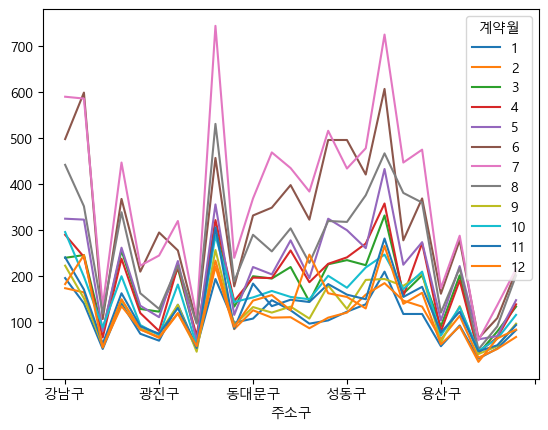

In [70]:
pd.pivot_table(
    df_apt,
    index='주소구', # 행 인덱스로 사용할 컬럼
    columns='계약월', # 칼럼으로 사용할 컬럼
    values='층', # 통계대상이 될 컬럼
    aggfunc='count' # 집계함수
).plot.line()

#### 강남구의 월별 거래건수를 선그래프로 그리시오

<Axes: xlabel='주소구'>

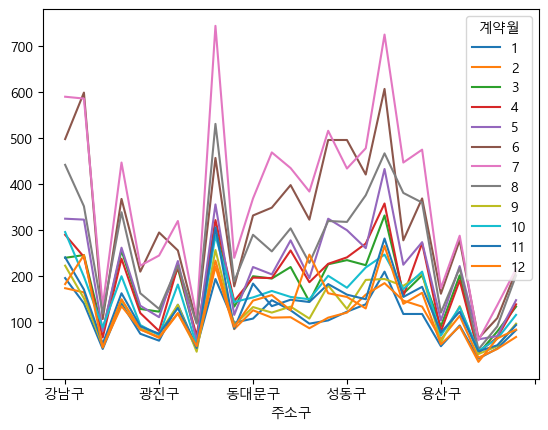

In [72]:
countByAddrGuMonth.plot.line()

<Axes: xlabel='계약월'>

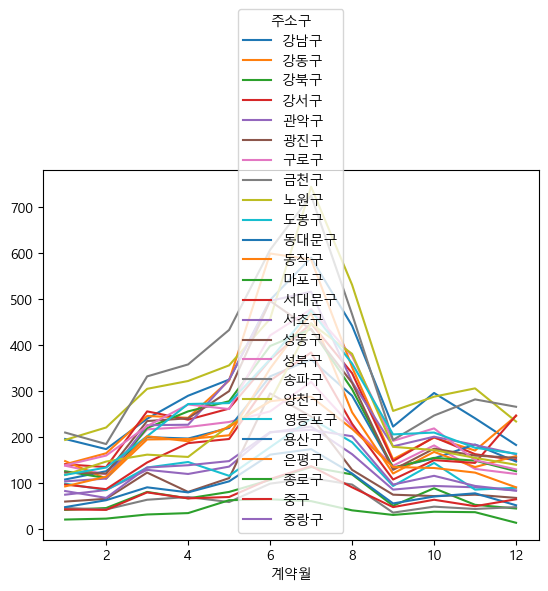

In [73]:
countByAddrGuMonth.T.plot.line()

<Axes: xlabel='계약월'>

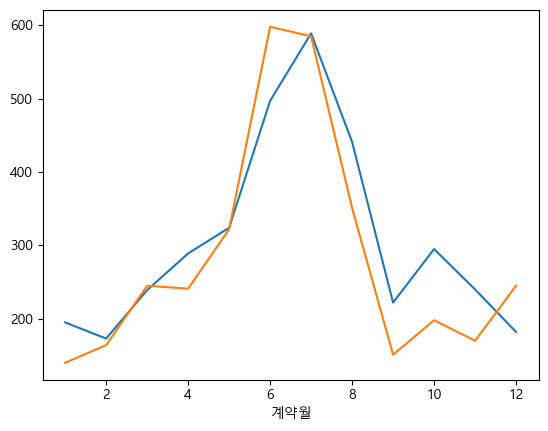

In [83]:
countByAddrGuMonth.loc["강남구"].plot.line()
countByAddrGuMonth.loc["강동구"].plot.line()

Text(0.5, 1.0, '강남구,강동구의 월별 거래건수')

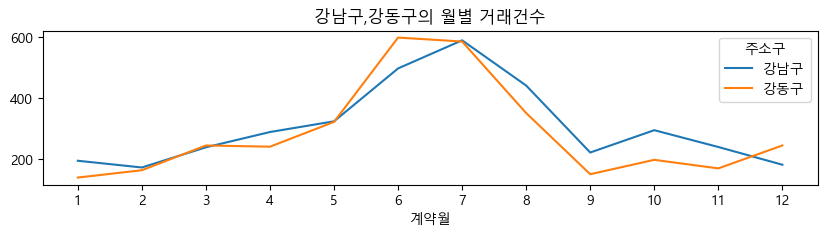

In [88]:
countByAddrGuMonth.loc[["강남구",'강동구']].T.plot.line(
    figsize=(10,2),
    xticks=countByAddrGuMonth.columns)
plt.title("강남구,강동구의 월별 거래건수")

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

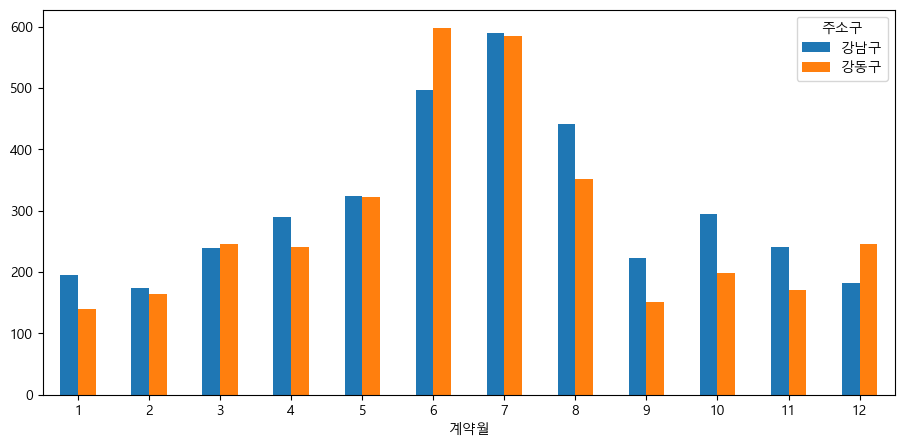

In [131]:
df_plot = countByAddrGuMonth.loc[["강남구", "강동구"]].T
ax = df_plot.plot.bar(figsize=(11, 5))
ax.set_xticks(range(len(df_plot.index)))  # 위치
ax.set_xticklabels(df_plot.index, rotation=0)  # 라벨

Text(0.5, 1.0, '강남구,강동구의 월별 거래건수')

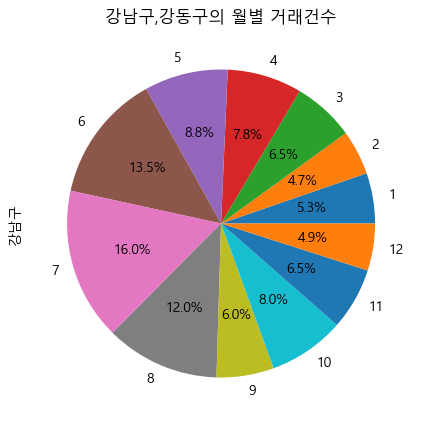

In [100]:
countByAddrGuMonth.loc["강남구"].T.plot.pie(
    figsize=(11,5),
    autopct='%1.1f%%')
plt.title("강남구,강동구의 월별 거래건수")

#### 강남구의 거래금액의 박스그래프

<Axes: >

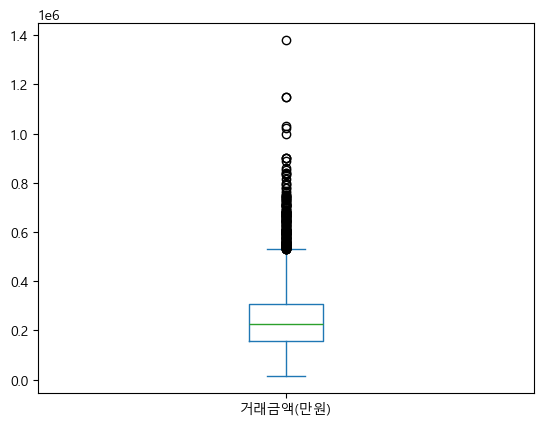

In [108]:
df_apt.query("주소구 == '강남구'")[['거래금액(만원)']].plot.box()

#### 강남구의 전용면적과 거래금액을 이용하여 산점도 표시

<Axes: xlabel='전용면적(㎡)', ylabel='거래금액(만원)'>

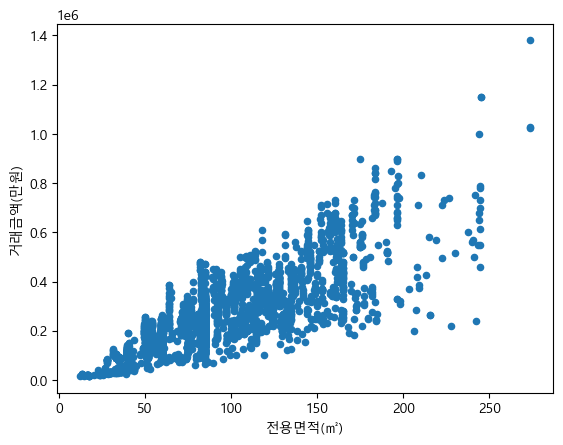

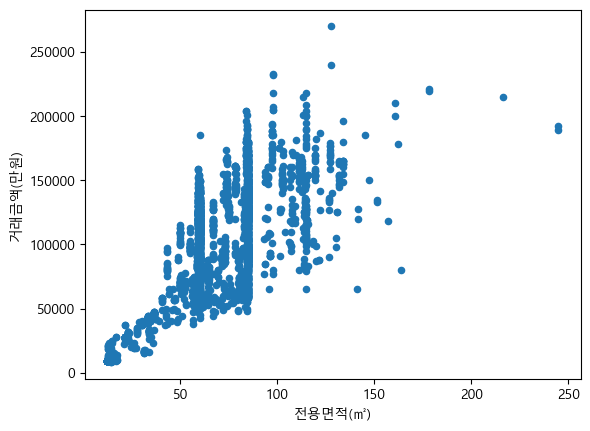

In [114]:
df_apt.query('주소구 == "강남구"').plot.scatter(x='전용면적(㎡)', y='거래금액(만원)')
df_apt.query('주소구 == "강동구"').plot.scatter(x='전용면적(㎡)', y='거래금액(만원)')

#### 강남구의 전용면적과 거래금액을 이용하여 seaborn 산점도 표시

In [144]:
df_apt = df_apt.rename(columns={'전용면적(㎡)':'전용면적'})

<Axes: xlabel='전용면적', ylabel='거래금액(만원)'>

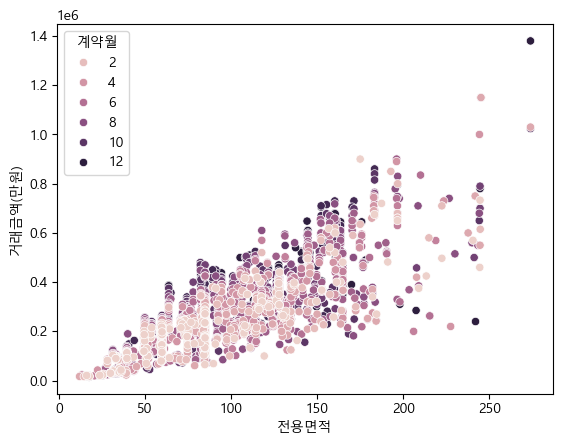

In [145]:
import seaborn as sns
gangnam = df_apt.query('주소구 == "강남구"')
sns.scatterplot(data = gangnam, x = '전용면적', y = '거래금액(만원)', hue='계약월')

- 강남구와 강동구의 전용면적과 거래금액을 이용하여 seaborn 산점도 표시
- 구별로 색을 달리 표시

<Axes: xlabel='전용면적', ylabel='거래금액(만원)'>

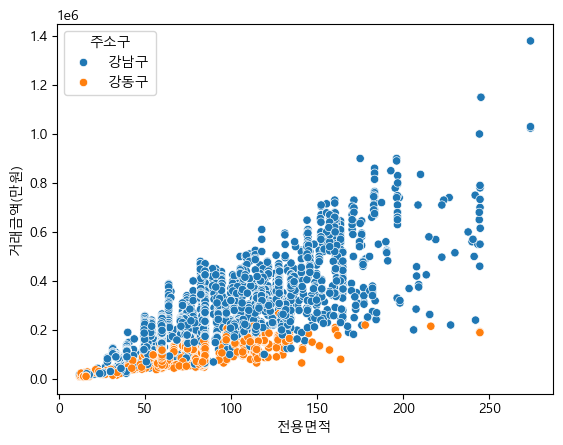

In [153]:
gangnam = df_apt.query('주소구 in ("강남구","강동구")')
sns.scatterplot(data = gangnam, x = '전용면적', y = '거래금액(만원)', hue='주소구')

#### 구별 평균 거래금액을 막대그래프로 표시

<Axes: >

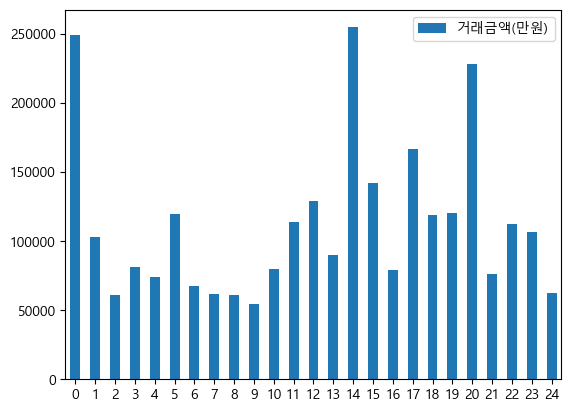

In [161]:
df_apt.groupby('주소구',as_index=False)['거래금액(만원)'].mean().plot.bar(rot=0)

<Axes: xlabel='계약월', ylabel='count'>

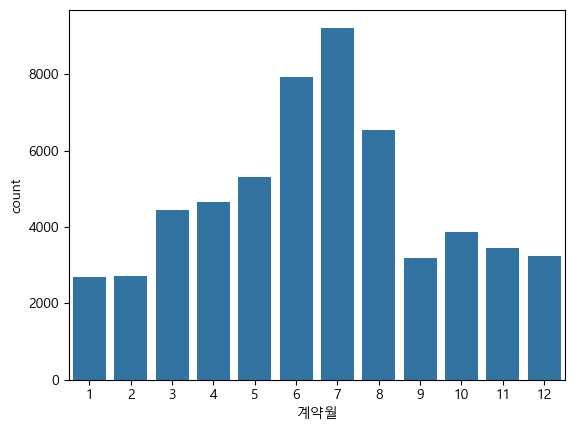

In [166]:
sns.countplot(data = df_apt,x='계약월')

In [167]:
# economics 데이터 불러오기
economics = pd.read_csv('./data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

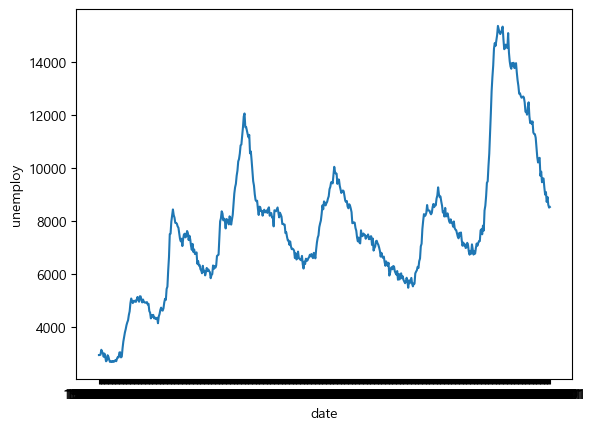

In [168]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [169]:
economics.date

0      1967-07-01
1      1967-08-01
2      1967-09-01
3      1967-10-01
4      1967-11-01
          ...    
569    2014-12-01
570    2015-01-01
571    2015-02-01
572    2015-03-01
573    2015-04-01
Name: date, Length: 574, dtype: object